In [1]:
include("c:/Users/vikra/OneDrive/Desktop/project/src/QuantumDD/QuantumDD.jl")
cd("c:/Users/vikra/OneDrive/Desktop/project")
using Pkg
Pkg.activate(".")
using .QuantumDD, Plots, LsqFit, FFTW, QuantumToolbox

  Activating project at `c:\Users\vikra\OneDrive\Desktop\project`


## CDD with various number of square $\pi$-pulses vs FID under White noises

┌ Info: Simulating FID
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sZmlsZQ==.jl:17
Simulating 100%|█████████████████████████████████████████| Time: 0:00:08
┌ Info: Simulating level-1 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Simulating level-2 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Simulating level-3 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W2sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:03
┌ Info: 

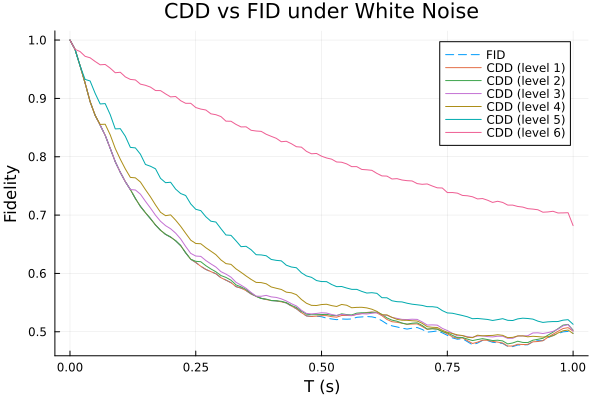

In [ ]:
sequence = "CDD"
T_max = 1.0
n_realizations = 1000
dt = 1e-3
pulse_duration = dt
σ = 0.2
pulse_shape = "square"
ψ₀ = normalize(basis(2, 0) + basis(2, 1))
# Pulse counts to try
cdd_levels = [1,2,3,4,5,6]

# Noise setup
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

# Run baseline FID
@info "Simulating FID"
T_vals, avg_fid = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
)

# Start plot with FID
plt = plot(T_vals, avg_fid, label="FID", linestyle=:dash, xlabel="T (s)", ylabel="Fidelity")

for cdd_level in cdd_levels
    @info "Simulating level-$cdd_level CDD"
    control_terms = make_control_terms(sequence, T_max, cdd_level;
        pulse_duration=pulse_duration,
        shape=pulse_shape,
        axis=:x,
        pulse_amplitude=π,
        center_pulse=true
    )

    T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
        ψ₀ = ψ₀,
        T_max = T_max,
        dt = dt,
        target_std = σ,
        n_realizations = n_realizations,
        S_func_z = S_func,
        control_terms = control_terms
    )

    plot!(plt, T_vals_ctrl, avg_fid_ctrl, label="CDD (level $cdd_level)")
end

title!(plt, "CDD vs FID under White Noise")
plot!(plt, legend=:topright)
display(plt)


┌ Info: Simulating FID
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:17
Simulating 100%|█████████████████████████████████████████| Time: 0:00:06
┌ Info: Simulating level-1 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: Simulating level-2 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Simulating level-3 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:02
┌ Info: 

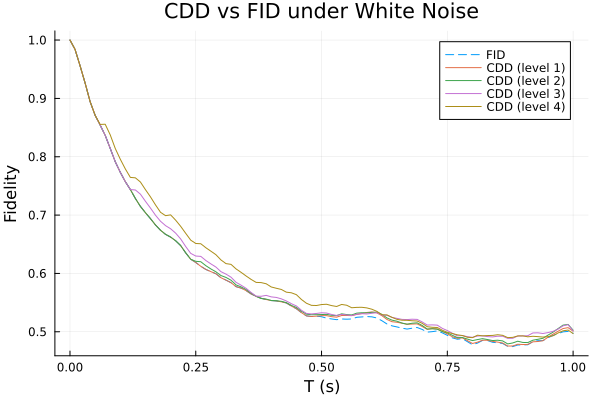

In [2]:
sequence = "CDD"
T_max = 1.0
n_realizations = 1000
dt = 0.01
pulse_duration = dt
σ = 0.5
pulse_shape = "square"
ψ₀ = normalize(basis(2, 0) + basis(2, 1))
# Pulse counts to try
cdd_levels = [1,2,3,4]

# Noise setup
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

# Run baseline FID
@info "Simulating FID"
T_vals, avg_fid = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
)

# Start plot with FID
plt = plot(T_vals, avg_fid, label="FID", linestyle=:dash, xlabel="T (s)", ylabel="Fidelity")

for cdd_level in cdd_levels
    @info "Simulating level-$cdd_level CDD"
    control_terms = make_control_terms(sequence, T_max, cdd_level;
        pulse_duration=pulse_duration,
        shape=pulse_shape,
        axis=:x,
        pulse_amplitude=π,
        center_pulse=true
    )

    T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
        ψ₀ = ψ₀,
        T_max = T_max,
        dt = dt,
        target_std = σ,
        n_realizations = n_realizations,
        S_func_z = S_func,
        control_terms = control_terms
    )

    plot!(plt, T_vals_ctrl, avg_fid_ctrl, label="CDD (level $cdd_level)")
end

title!(plt, "CDD vs FID under White Noise")
plot!(plt, legend=:topright)
display(plt)


┌ Info: Simulating FID
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:17
Simulating 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Simulating level-1 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:31
┌ Info: Simulating level-2 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Simulating level-3 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:03
┌ Info: Simulating level-4 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\n

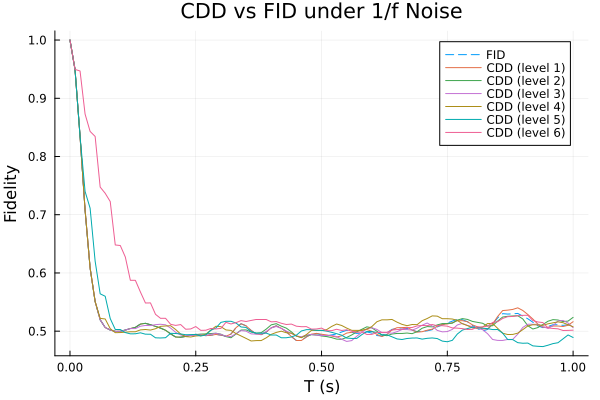

In [ ]:
sequence = "CDD"
T_max = 1.0
n_realizations = 1000
dt = 0.01
pulse_duration = dt
σ = 0.025
pulse_shape = "square"
ψ₀ = normalize(basis(2, 0) + basis(2, 1))
# Pulse counts to try
cdd_levels = [1,2,3,4,5,6]

# Noise setup
parameters = get_preset_params("1/f")
S_func = ω -> S(ω; parameters...)

# Run baseline FID
@info "Simulating FID"
T_vals, avg_fid = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
)

# Start plot with FID
plt = plot(T_vals, avg_fid, label="FID", linestyle=:dash, xlabel="T (s)", ylabel="Fidelity")

for cdd_level in cdd_levels
    @info "Simulating level-$cdd_level CDD"
    control_terms = make_control_terms(sequence, T_max, cdd_level;
        pulse_duration=pulse_duration,
        shape=pulse_shape,
        axis=:x,
        pulse_amplitude=π,
        center_pulse=true
    )

    T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
        ψ₀ = ψ₀,
        T_max = T_max,
        dt = dt,
        target_std = σ,
        n_realizations = n_realizations,
        S_func_z = S_func,
        control_terms = control_terms
    )

    plot!(plt, T_vals_ctrl, avg_fid_ctrl, label="CDD (level $cdd_level)")
end

title!(plt, "CDD vs FID under 1/f Noise")
plot!(plt, legend=:topright)
display(plt)


┌ Info: Simulating FID
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:17
Simulating 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Simulating level-1 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:31
┌ Info: Simulating level-2 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Simulating level-3 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\notebooks\Hahn echo and CPMG\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:31
Simulating 100%|█████████████████████████████████████████| Time: 0:00:03
┌ Info: Simulating level-4 CDD
└ @ Main c:\Users\vikra\OneDrive\Desktop\project\n

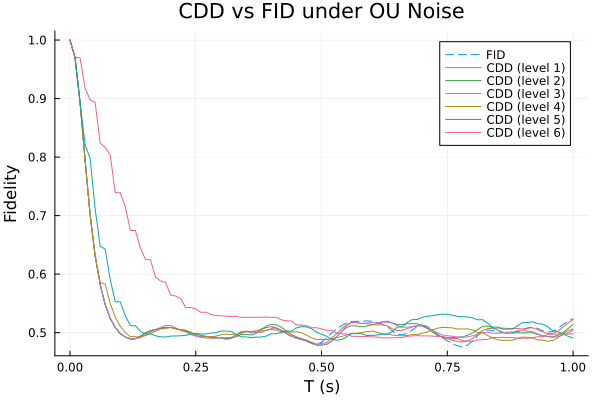

In [4]:
sequence = "CDD"
T_max = 1.0
n_realizations = 1000
dt = 0.01
pulse_duration = dt
σ = 0.5
pulse_shape = "square"
ψ₀ = normalize(basis(2, 0) + basis(2, 1))
# Pulse counts to try
cdd_levels = [1,2,3,4,5,6]

# Noise setup
parameters = get_preset_params("ou")
S_func = ω -> S(ω; parameters...)

# Run baseline FID
@info "Simulating FID"
T_vals, avg_fid = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std = σ,
    n_realizations = n_realizations,
    S_func_z = S_func,
)

# Start plot with FID
plt = plot(T_vals, avg_fid, label="FID", linestyle=:dash, xlabel="T (s)", ylabel="Fidelity")

for cdd_level in cdd_levels
    @info "Simulating level-$cdd_level CDD"
    control_terms = make_control_terms(sequence, T_max, cdd_level;
        pulse_duration=pulse_duration,
        shape=pulse_shape,
        axis=:x,
        pulse_amplitude=π,
        center_pulse=true
    )

    T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
        ψ₀ = ψ₀,
        T_max = T_max,
        dt = dt,
        target_std = σ,
        n_realizations = n_realizations,
        S_func_z = S_func,
        control_terms = control_terms
    )

    plot!(plt, T_vals_ctrl, avg_fid_ctrl, label="CDD (level $cdd_level)")
end

title!(plt, "CDD vs FID under OU Noise")
plot!(plt, legend=:topright)
display(plt)
